<a href="https://colab.research.google.com/github/Avneet-0001/Thesis-research-project/blob/master/Fear_of_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Sensitivity to $p$

In [68]:
#Parameters
beta = 2/7
gamma = beta/2
beta_fd = 1.1*beta
alpha_f = 2.2*beta
gamma_f = 0.05
p_val = [0.0,0.2,0.4,0.6,0.8,1.0]# np.linspace(0.1, 1, 70)

Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
t, dt = np.linspace(0,400,1000, retstep=True)


In [69]:
def model(Ic,t,p):
  s, s_fd, i, r_nat = Ic

  dS = -beta*s*i - beta_fd*(s_fd+i)*s + gamma_f*s_fd + alpha_f*r_nat*s_fd #dS/dt
  dS_fd = beta_fd*(s_fd+i)*s-gamma_f*s_fd-alpha_f*r_nat*s_fd-p*beta*i*s_fd #dS_fd/dt
  dI = beta*s*i-gamma*i+p*beta*i*s_fd #dI/dt
  dR_nat = gamma*i #dR_nat/dt

  dmodel = [dS, dS_fd, dI, dR_nat]

  return dmodel

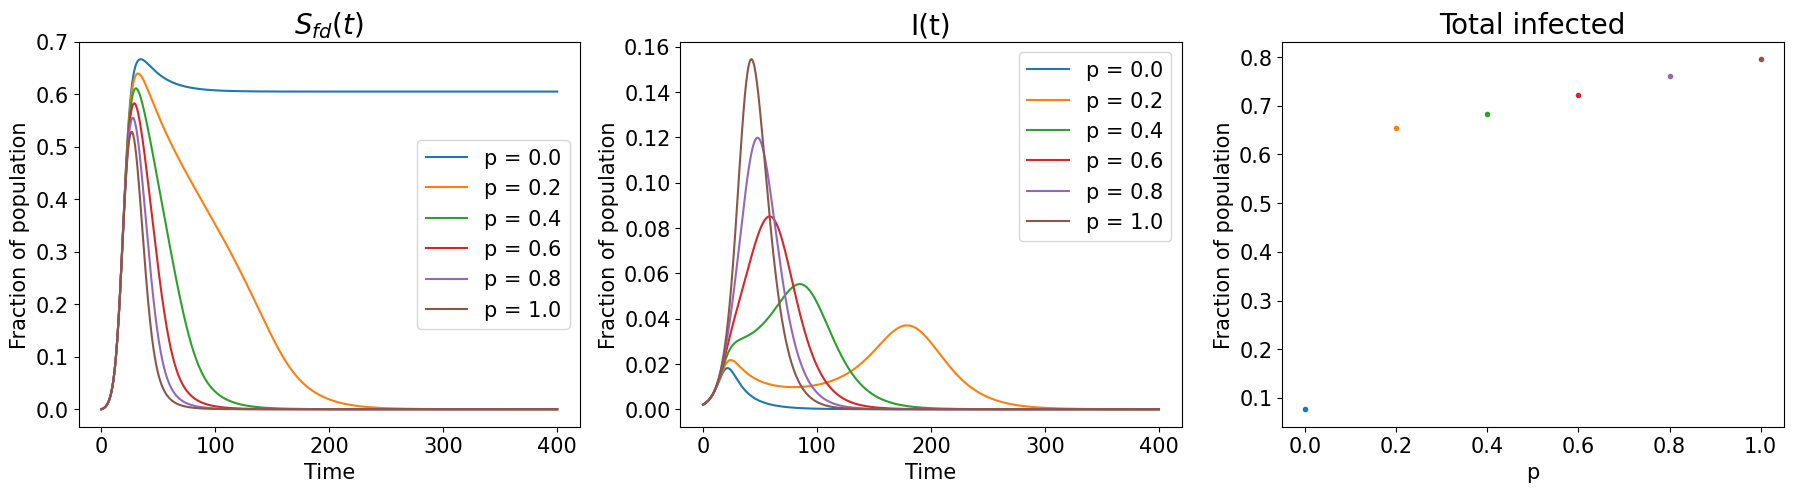

In [70]:
fig,axis = plt.subplots(1,3,figsize=(22,5))
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

for l in range(len(p_val)):
  p = p_val[l]
  z = odeint(model, Ic, t, args=(p_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  #print(total_infected)

  axis[0].plot(t,z[:,1],label='p = ' + str(p_val[l]))
  axis[0].set_title(r'$S_{fd}(t)$')
  axis[0].set_xlabel('Time', fontsize='15')
  axis[0].set_ylabel('Fraction of population', fontsize='15')
  axis[0].legend(fontsize=15)

  axis[1].plot(t,z[:,2],label='p = ' + str(p_val[l]))
  axis[1].set_title('I(t)')
  axis[1].set_xlabel('Time', fontsize='15')
  axis[1].set_ylabel('Fraction of population', fontsize='15')
  axis[1].legend(fontsize=15)

  axis[2].plot(p_val[l], total_infected,'.')
  axis[2].set_xlabel('p', fontsize='15')
  axis[2].set_ylabel('Fraction of population', fontsize='15')
  axis[2].set_title('Total infected')

  for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

# Sensitivity to $\alpha_f$

In [71]:
#Parameters

beta = 2/7
gamma = beta/2
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
alpha_f_val = [1.0*beta,1.2*beta,1.4*beta,1.8*beta,2.5*beta,3.5*beta]

Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
t, dt = np.linspace(0,2000,1000, retstep=True)


In [72]:
def model(Ic,t,alpha_f):
  s, s_fd, i, r_nat = Ic

  dS = -beta*s*i - beta_fd*(s_fd+i)*s + gamma_f*s_fd + alpha_f*r_nat*s_fd #dS/dt
  dS_fd = beta_fd*(s_fd+i)*s-gamma_f*s_fd-alpha_f*r_nat*s_fd-p*beta*i*s_fd #dS_fd/dt
  dI = beta*s*i-gamma*i+p*beta*i*s_fd #dI/dt
  dR_nat = gamma*i #dR_nat/dt

  dmodel = [dS, dS_fd, dI, dR_nat]

  return dmodel

0.17062336638370118
0.581664615382039
0.6051036983184499
0.6381044292131375
0.6734823511407176
0.7025324929945462
Final size =  0.17062336638370118
R_nat_f =  0.17207940447256595
R_nat_f for non-zero steady state =  0.1720794041633544
Verifying S+R=1 0.48760613553016086 

Final size =  0.581664615382039
R_nat_f =  0.5831206253819712
R_nat_f for non-zero steady state =  0.23630609359377275
Verifying S+R=1 1.0000000002115415 

Final size =  0.6051036983184499
R_nat_f =  0.6065597582996856
R_nat_f for non-zero steady state =  0.18413161847885792
Verifying S+R=1 1.0000000000000502 

Final size =  0.6381044292131375
R_nat_f =  0.639560393317846
R_nat_f for non-zero steady state =  0.12304642630582116
Verifying S+R=1 1.0000000000000988 

Final size =  0.6734823511407176
R_nat_f =  0.6749384052744307
R_nat_f for non-zero steady state =  0.07302710167924524
Verifying S+R=1 0.999999999999988 

Final size =  0.7025324929945462
R_nat_f =  0.7039883660330382
R_nat_f for non-zero steady state =  0.

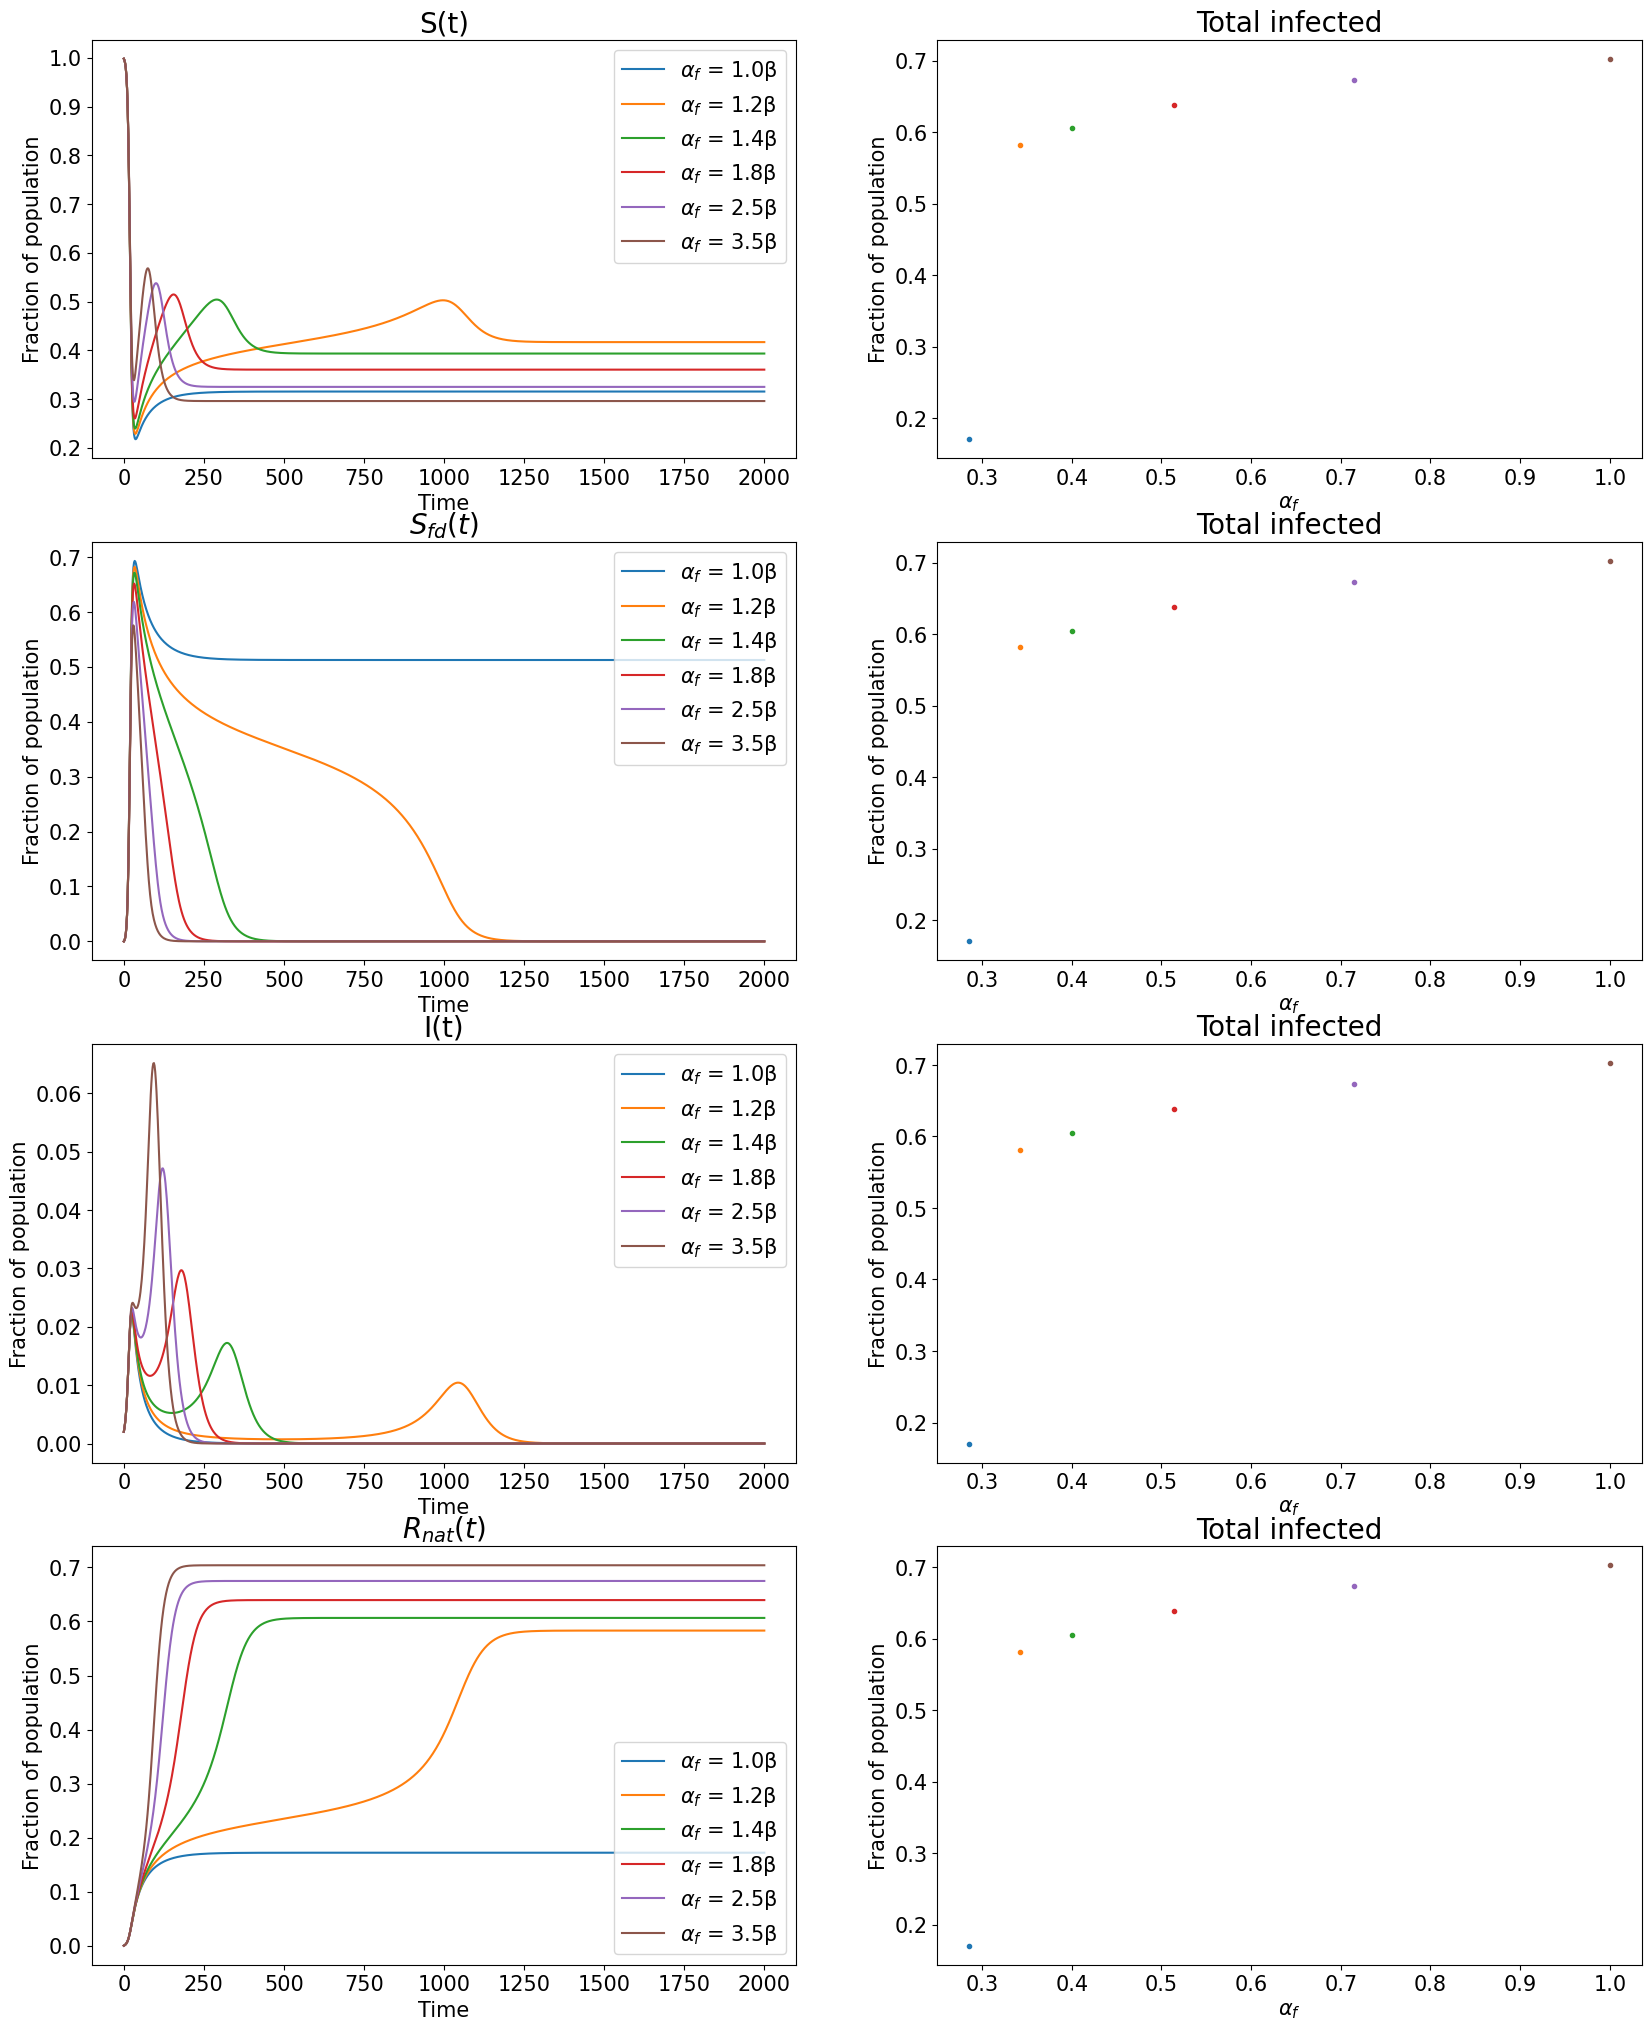

In [73]:
alpha_f_str = ['1.0β','1.2β','1.4β','1.8β','2.5β','3.5β']

for l in range(len(alpha_f_val)):
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(alpha_f_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  print(total_infected)


fig,axis = plt.subplots(4,2,figsize=(20,25))

for l in range(len(alpha_f_val)):
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(alpha_f_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  print('Final size = ', total_infected)
  print('R_nat_f = ', z[len(z[:,3])-1,3])
  print('R_nat_f for non-zero steady state = ', (beta_fd*z[len(z[:,0])-1,0] - gamma_f)/alpha_f)
  print('Verifying S+R=1', z[len(z[:,0])-1,0] + z[len(z[:,3])-1,3],'\n')
  #print('First final size eqn', (beta_fd*np.exp(-p*beta*z[len(z[:,3])-1,3]/gamma)-(gamma_f + p*beta_fd - p*gamma_f))/(alpha_f - p*beta_fd-p*alpha_f),'\n')

  axis[0][0].plot(t, z[:,0], label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[0][0].set_title('S(t)')
  axis[0][0].set_xlabel('Time', fontsize=15)
  axis[0][0].set_ylabel('Fraction of population', fontsize=15)
  axis[0][0].legend(fontsize=15)

  axis[0][1].plot(alpha_f, total_infected,'.')
  axis[0][1].set_xlabel('$α_f$', fontsize=15)
  axis[0][1].set_ylabel('Fraction of population', fontsize=15)
  axis[0][1].set_title('Total infected')

  axis[1][0].plot(t, z[:,1], label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[1][0].set_title('$S_{fd}(t)$')
  axis[1][0].set_xlabel('Time', fontsize=15)
  axis[1][0].set_ylabel('Fraction of population', fontsize=15)
  axis[1][0].legend(fontsize=15)

  axis[1][1].plot(alpha_f, total_infected,'.')
  axis[1][1].set_xlabel('$α_f$', fontsize=15)
  axis[1][1].set_ylabel('Fraction of population', fontsize=15)
  axis[1][1].set_title('Total infected')


  axis[2][0].plot(t,z[:,2],label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[2][0].set_title('I(t)')
  axis[2][0].set_xlabel('Time', fontsize=15)
  axis[2][0].set_ylabel('Fraction of population', fontsize=15)
  axis[2][0].legend(fontsize=15)

  axis[2][1].plot(alpha_f, total_infected,'.')
  axis[2][1].set_xlabel('$α_f$', fontsize=15)
  axis[2][1].set_ylabel('Fraction of population', fontsize=15)
  axis[2][1].set_title('Total infected')

  axis[3][0].plot(t, z[:,3], label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[3][0].set_title('$R_{nat}(t)$')
  axis[3][0].set_xlabel('Time', fontsize=15)
  axis[3][0].set_ylabel('Fraction of population', fontsize=15)
  axis[3][0].legend(fontsize=15)

  axis[3][1].plot(alpha_f, total_infected,'.')
  axis[3][1].set_xlabel('$α_f$', fontsize=15)
  axis[3][1].set_ylabel('Fraction of population', fontsize=15)
  axis[3][1].set_title('Total infected')

  for ax in axis.flat:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

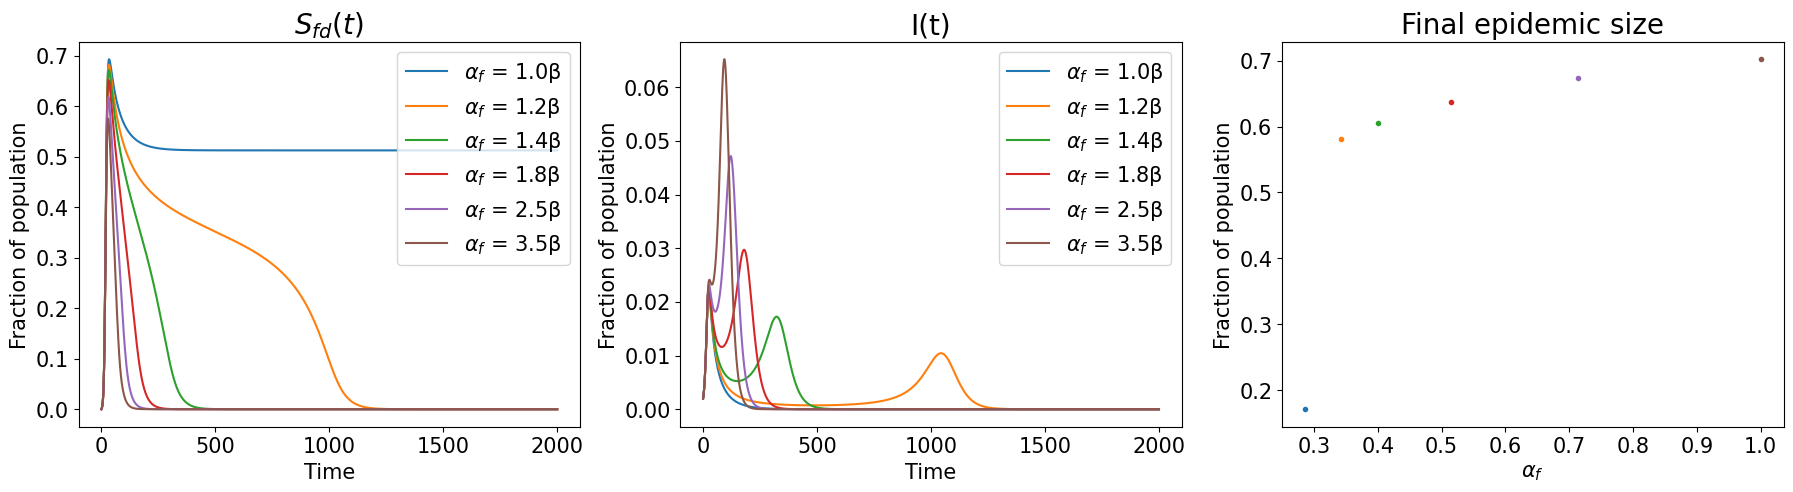

In [74]:
fig,axis = plt.subplots(1,3,figsize=(22,5))
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

for l in range(len(alpha_f_val)):
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(alpha_f_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  #print(total_infected)
  axis[0].plot(t,z[:,1],label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[0].set_title(r'$S_{fd}(t)$')
  axis[0].set_xlabel('Time', fontsize='15')
  axis[0].set_ylabel('Fraction of population', fontsize='15')
  axis[0].legend(fontsize=15)

  axis[1].plot(t,z[:,2],label='$α_f$ = ' + str(alpha_f_str[l]))
  axis[1].set_title('I(t)')
  axis[1].set_xlabel('Time', fontsize='15')
  axis[1].set_ylabel('Fraction of population', fontsize='15')
  axis[1].legend(fontsize=15)

  axis[2].plot(alpha_f_val[l], total_infected,'.')
  axis[2].set_xlabel('$α_f$', fontsize='15')
  axis[2].set_ylabel('Fraction of population', fontsize='15')
  axis[2].set_title('Final epidemic size')

for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

# Flu-like/Established disease limit

In [75]:
# Changed delta, a_1

#Parameters
beta = 2/7
gamma = beta/2
#beta_fd = 1.1*beta

delta =  0.01
gamma_f = delta*gamma #0.05
a_1 = np.linspace(0,50,50)
beta_fd_val = a_1*gamma_f
p = 1/4
b = 1.1
alpha_f = b*gamma_f

Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
t = np.linspace(0,2500,1000)#(0,500,600) #(0,2500,1000)

# print(gamma_f)
# print(a_1)
# print(beta_fd_val)
# print(beta_fd_val/beta)

In [76]:

def model(Ic,t,beta_fd):
  s, s_fd, i, r_nat = Ic

  dS = -beta*s*i - beta_fd*(s_fd+i)*s + gamma_f*s_fd + alpha_f*r_nat*s_fd #dS/dt
  dS_fd = beta_fd*(s_fd+i)*s-gamma_f*s_fd-alpha_f*r_nat*s_fd-p*beta*i*s_fd #dS_fd/dt
  dI = beta*s*i-gamma*i+p*beta*i*s_fd #dI/dt
  dR_nat = gamma*i #dR_nat/dt

  dmodel = [dS, dS_fd, dI, dR_nat]

  return dmodel

In [77]:
S_inf = []
S_1_inf = []
array = []

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd,))
  S_inf.append(z[len(t)-1,0])
  S_1_inf.append(z[len(t)-1,1])
  array.append([beta_fd, z[len(t)-1,1]])
  #plt.plot(a_1[l], z[len(t)-1,1])

a = beta/gamma
A_0 = Ic[2] - (1/a)*np.log(Ic[0]) + Ic[0]
#print(A_0)

x_0 = 0.1 # Got this root from desmos.

S_10 = 0
y_0 = -(1+b*(1-x_0))/(a*(1-p)) + (S_10 + Ic[0]*(1+b*(1-x_0))/(x_0*a*(1-p)))*(x_0/Ic[0])**p
print(y_0)
x_1 = (a*x_0*(y_0-S_10) + (1+b*(1-x_0))*(x_0-Ic[0]-Ic[1]))/(1-a*x_0)
print(x_1)

a_1c0 = (1+b*(1-x_0))/x_0
print("a_1c0: major contribution to a_1", a_1c0)

a_1c1 = -(x_1+y_0)*(1+b)/x_0**2
print("a_1c1: delta order contribution to a_1", a_1c1)
print("delta*a_1c1", delta*a_1c1)

a_1c_tay = a_1c0+delta*a_1c1
print("a_1c0+delta*a_1c1", a_1c0+delta*a_1c1) # this is agreeing with the plot

a_1c = (1+b*(1-x_0-delta*(x_1+y_0)))/(x_0+delta*(x_1+y_0))
print("a_1c without taylor expansion", a_1c)

print(a_1c_tay*gamma_f)


6.122534855171916
-0.703141286207021
a_1c0: major contribution to a_1 19.900000000000002
a_1c1: delta order contribution to a_1 -1138.0726494826279
delta*a_1c1 -11.380726494826279
a_1c0+delta*a_1c1 8.519273505173723
a_1c without taylor expansion 12.51921265325724
0.012170390721676748


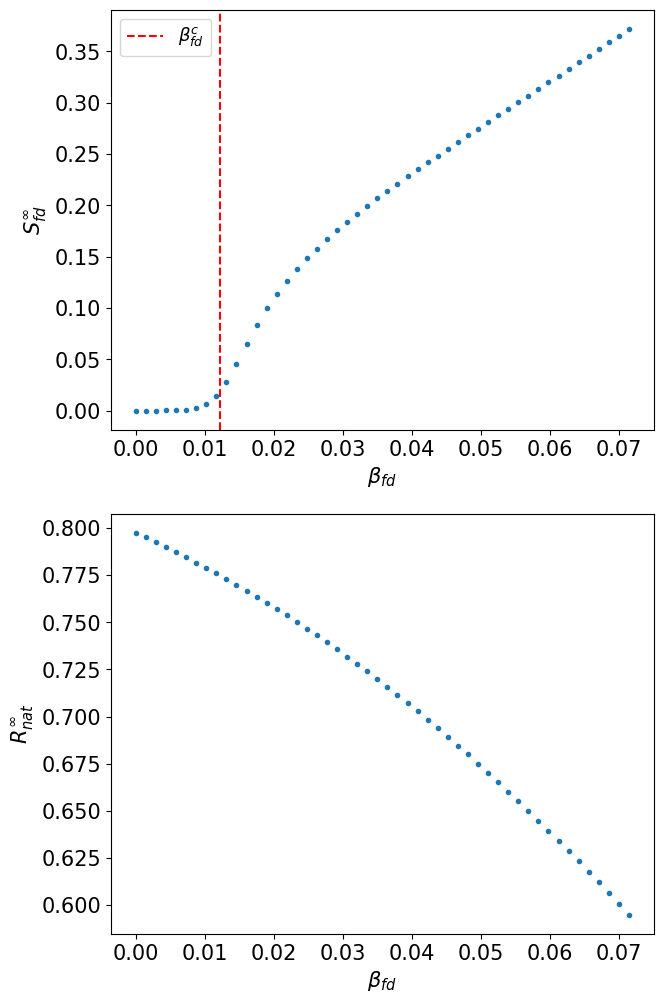

In [78]:
fig, ax = plt.subplots(2,1, figsize=(7,12))

ax[0].plot(beta_fd_val, S_1_inf,'.')
ax[0].set_xlabel('$β_{fd}$', fontsize='15')
ax[0].set_ylabel("$S_{fd}^\infty$", fontsize='15')
ax[0].axvline(x=a_1c_tay*gamma_f,color='r',ls='--',label='$β_{fd}^c$')
#plt.axvline(x=a_1c0*gamma_f,color='black',ls=':',label='$β_{fd0}^c$')
ax[0].legend()

R_inf = np.ones(len(S_inf))-[sum(n) for n in zip(*[S_inf, S_1_inf])]
#R_inf = S_inf+S_1_inf
#print(len(R_inf))
ax[1].plot(beta_fd_val,R_inf,'.')
ax[1].set_xlabel('$β_{fd}$', fontsize='15')
ax[1].set_ylabel('$R_{nat}^\infty$', fontsize='15')

for axis in ax:
    axis.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    axis.tick_params(axis='y', labelsize=15)

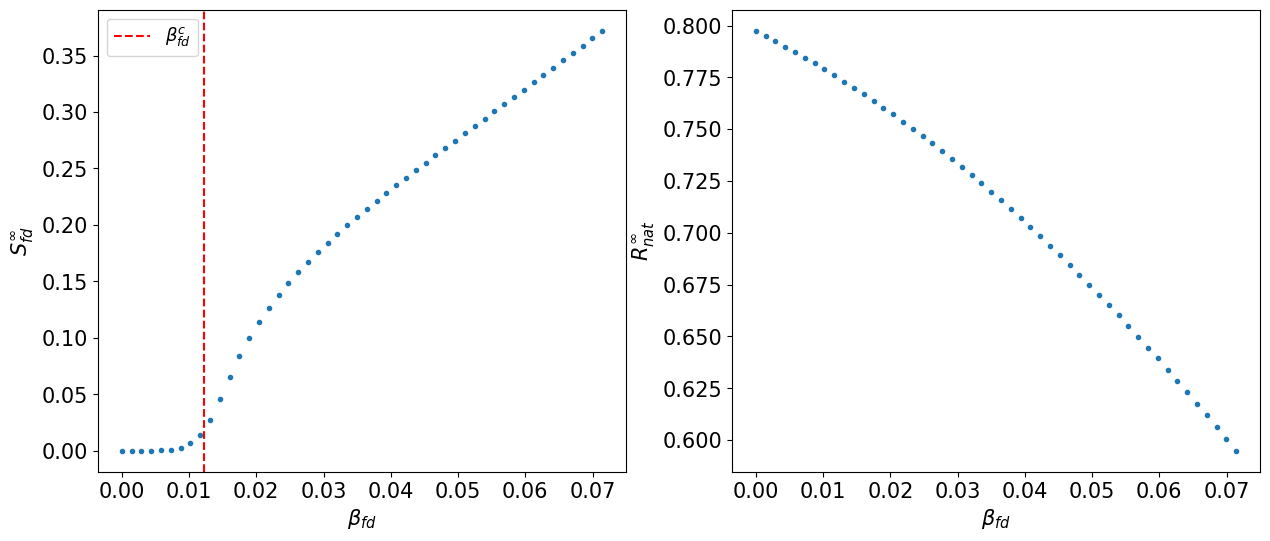

In [79]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(beta_fd_val, S_1_inf,'.')
ax[0].set_xlabel('$β_{fd}$', fontsize='15')
ax[0].set_ylabel("$S_{fd}^\infty$", fontsize='15')
ax[0].axvline(x=a_1c_tay*gamma_f,color='r',ls='--',label='$β_{fd}^c$')
#plt.axvline(x=a_1c0*gamma_f,color='black',ls=':',label='$β_{fd0}^c$')
ax[0].legend()

R_inf = np.ones(len(S_inf))-[sum(n) for n in zip(*[S_inf, S_1_inf])]
#R_inf = S_inf+S_1_inf
#print(len(R_inf))
ax[1].plot(beta_fd_val,R_inf,'.')
ax[1].set_xlabel('$β_{fd}$', fontsize='15')
ax[1].set_ylabel('$R_{nat}^\infty$', fontsize='15')

for axis in ax:
    axis.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    axis.tick_params(axis='y', labelsize=15)

## Temporal plots

In [80]:
#Parameters

beta = 2/7
gamma = beta/2

delta =  0.01
gamma_f = delta*gamma #0.05

p = 0.25

b = 1.1
alpha_f = b*gamma_f

#a_1 = np.linspace(0,50,50)
beta_fd_val = [0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016] #a_1*gamma_f
beta_ratios = np.array(beta_fd_val)/beta
Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
t, dt = np.linspace(0,15000,16000, retstep=True)

#t = np.linspace(0,2500,1000)
print(beta_ratios)
print(gamma_f)
print(gamma)

[0.035  0.0385 0.042  0.0455 0.049  0.0525 0.056 ]
0.0014285714285714286
0.14285714285714285


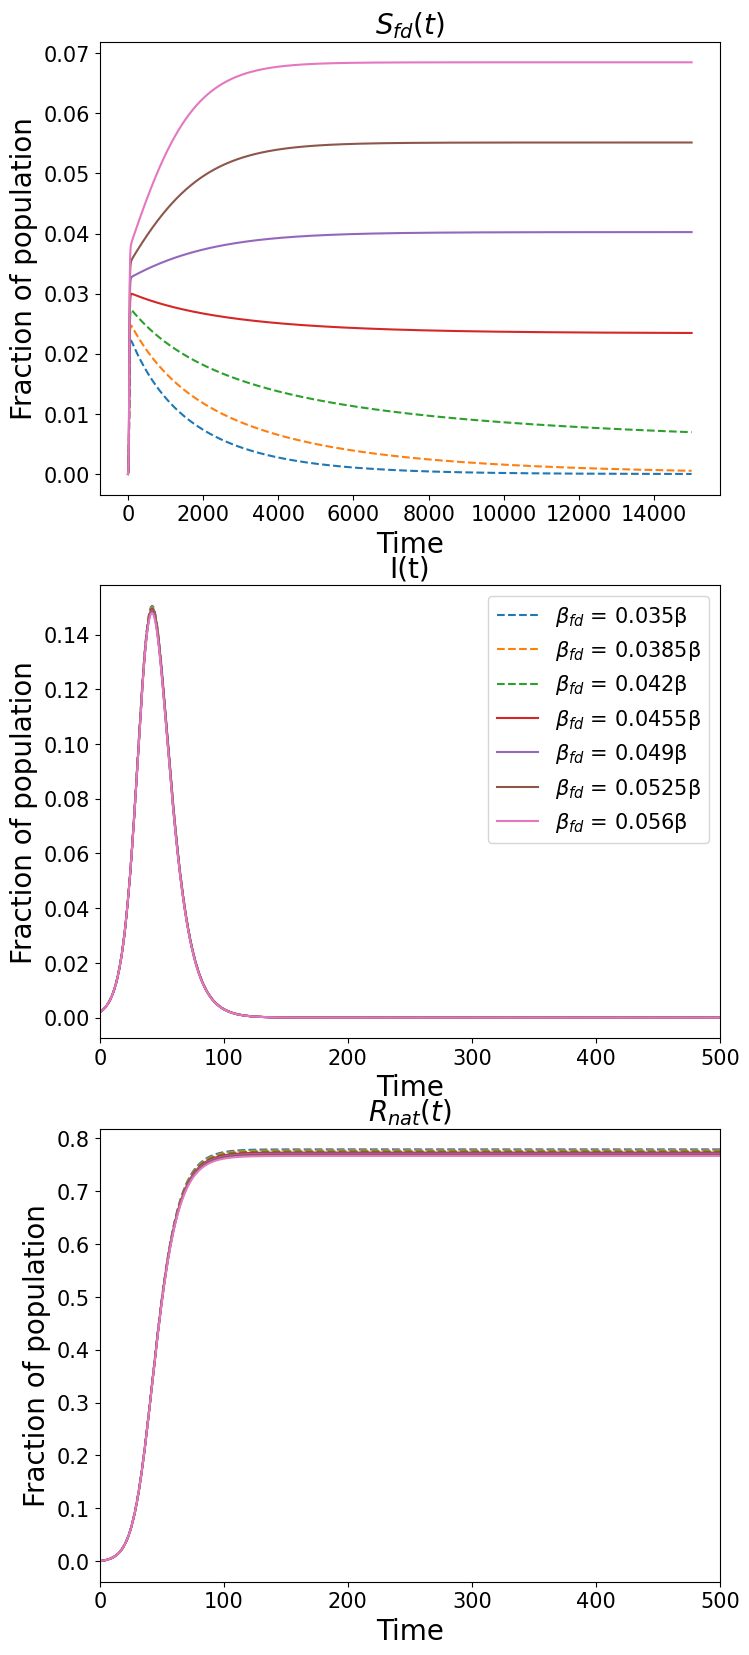

In [81]:
beta_fd_str = ['0.035β','0.0385β','0.042β','0.0455β','0.049β','0.0525β', '0.056β']
S_1_inf = []

fig,axis = plt.subplots(3,1,figsize=(8,20))
#plt.rcParams['font.size'] = 18 # For the whole figure
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

#labels = [0,0,25,50,75,100,125,150,175,200]

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  S_1_inf.append(z[len(t)-1,1])

  if beta_fd<=0.012:
    axis[0].plot(t, z[:,1],'--')
    axis[0].plot()
    #axis[0].set_title('$S_{fd}(t)$')
    #axis[0].set_xlabel('Time', fontsize=20)
    #axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)


    axis[1].plot(t,z[:,2], '--', label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3],'--')
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)

  else:
    axis[0].plot(t, z[:,1])
    axis[0].set_title('$S_{fd}(t)$')
    axis[0].set_xlabel('Time', fontsize=20)
    axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)

    axis[1].plot(t,z[:,2], label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3])
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)
    #axis[2].legend()

for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

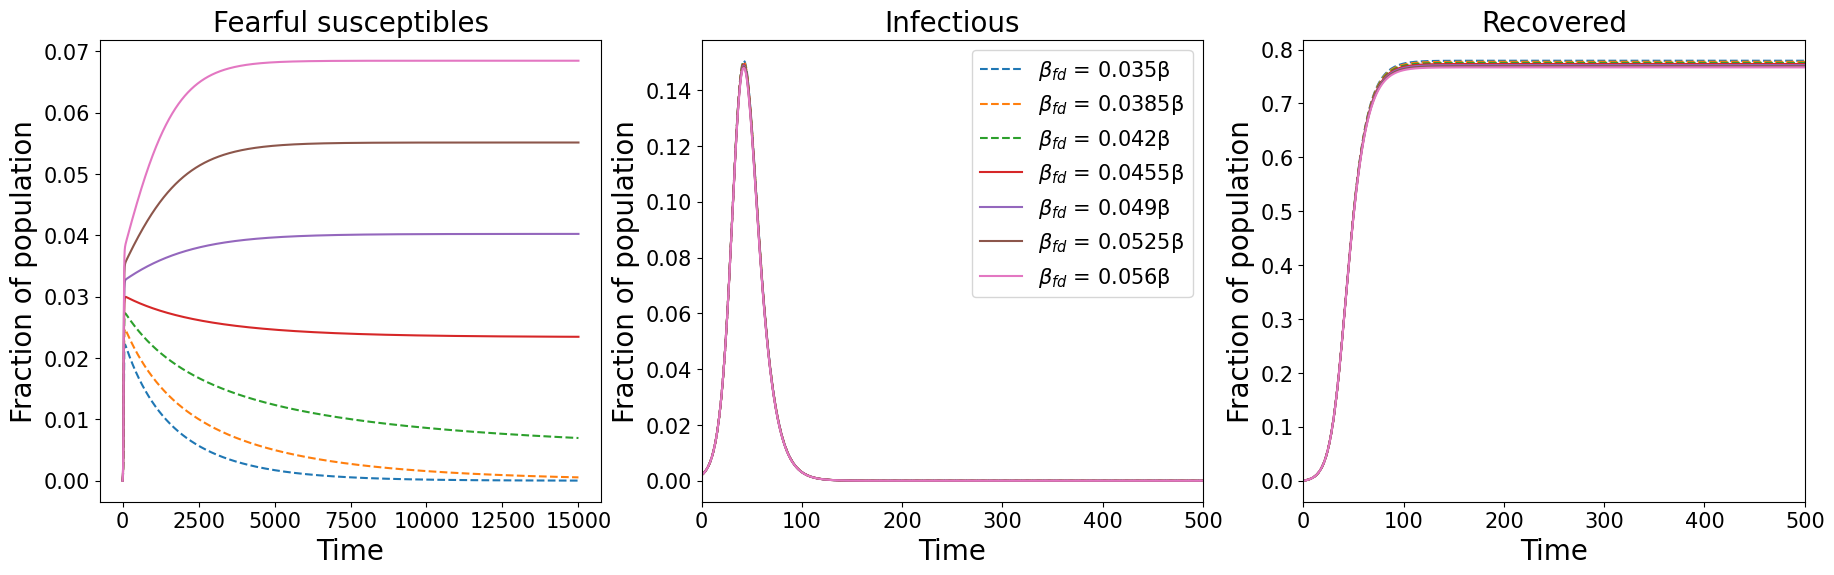

In [82]:
beta_fd_str = ['0.035β','0.0385β','0.042β','0.0455β','0.049β','0.0525β', '0.056β']
S_1_inf = []

fig,axis = plt.subplots(1,3,figsize=(22,6))
#plt.rcParams['font.size'] = 18 # For the whole figure
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

#labels = [0,0,25,50,75,100,125,150,175,200]

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  S_1_inf.append(z[len(t)-1,1])

  if beta_fd<=0.012:
    axis[0].plot(t, z[:,1],'--')
    axis[0].plot()
    #axis[0].set_title('$S_{fd}(t)$')
    #axis[0].set_xlabel('Time', fontsize=20)
    #axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)


    axis[1].plot(t,z[:,2], '--', label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3],'--')
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)

  else:
    axis[0].plot(t, z[:,1])
    axis[0].set_title('Fearful susceptibles')
    axis[0].set_xlabel('Time', fontsize=20)
    axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)

    axis[1].plot(t,z[:,2], label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('Infectious')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3])
    axis[2].set_title('Recovered')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)
    #axis[2].legend()


for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

# Covid-like/Novel disease limit

In [83]:
# Changed delta, a_1

#Parameters
beta = 2/7
gamma = beta/2
a = beta/gamma
print(a)
#beta_fd = 1.1*beta
alpha_f = 2.4*gamma  #0.00157
delta = 0.01
gamma_f = delta*gamma
p = 0.44 #p=0.1, 0.25

a_1 = np.linspace(0.01,12,20)
beta_fd_val = a_1*gamma

b = alpha_f/gamma

Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
I_0 = Ic[2]
t = np.linspace(0,1000,500)

print(gamma_f)
print(alpha_f)
print(beta_fd_val)
print(beta_fd_val/beta)
print(b)
print(b*gamma*(a-1))



2.0
0.0014285714285714286
0.3428571428571428
[1.42857143e-03 9.15789474e-02 1.81729323e-01 2.71879699e-01
 3.62030075e-01 4.52180451e-01 5.42330827e-01 6.32481203e-01
 7.22631579e-01 8.12781955e-01 9.02932331e-01 9.93082707e-01
 1.08323308e+00 1.17338346e+00 1.26353383e+00 1.35368421e+00
 1.44383459e+00 1.53398496e+00 1.62413534e+00 1.71428571e+00]
[5.00000000e-03 3.20526316e-01 6.36052632e-01 9.51578947e-01
 1.26710526e+00 1.58263158e+00 1.89815789e+00 2.21368421e+00
 2.52921053e+00 2.84473684e+00 3.16026316e+00 3.47578947e+00
 3.79131579e+00 4.10684211e+00 4.42236842e+00 4.73789474e+00
 5.05342105e+00 5.36894737e+00 5.68447368e+00 6.00000000e+00]
2.4
0.3428571428571428


0.3428571428571428


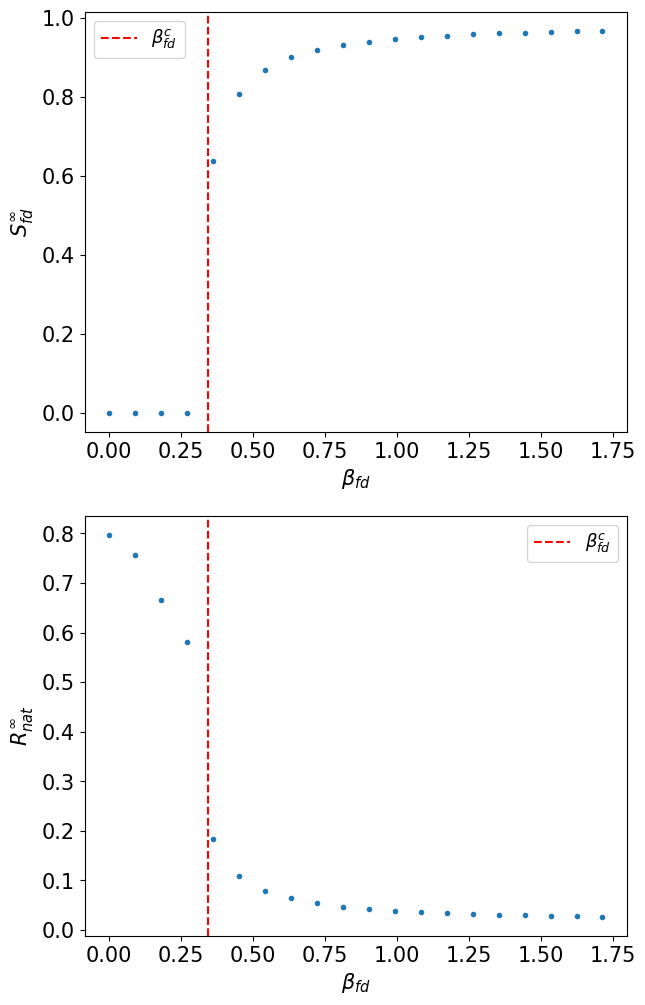

In [84]:
S_inf = []
S_1_inf = []
array = []

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd,))
  S_inf.append(z[len(t)-1,0])
  S_1_inf.append(z[len(t)-1,1])
  array.append([beta_fd, z[len(t)-1,1]])
  #plt.plot(a_1[l], z[len(t)-1,1])
  #plt.plot(z[:,0],z[:,1])
  #plt.ylim(0,0.0001)


fig, ax = plt.subplots(2,1, figsize=(7,12))

ax[0].plot(beta_fd_val, S_1_inf,'.')
ax[0].set_xlabel('$β_{fd}$', fontsize='15')
ax[0].set_ylabel("$S_{fd}^\infty$", fontsize='15')
ax[0].axvline(x=b*gamma*(a-1),color='r',ls='--',label='$β_{fd}^c$')
#plt.axvline(x=a_1c0*gamma_f,color='black',ls=':',label='$β_{fd0}^c$')
ax[0].legend()

R_inf = np.ones(len(S_inf))-[sum(n) for n in zip(*[S_inf, S_1_inf])]
#R_inf = S_inf+S_1_inf
#print(len(R_inf))
ax[1].plot(beta_fd_val,R_inf,'.')
ax[1].set_xlabel('$β_{fd}$', fontsize='15')
ax[1].set_ylabel('$R_{nat}^\infty$', fontsize='15')
ax[1].axvline(x=b*gamma*(a-1),color='r',ls='--',label='$β_{fd}^c$')
ax[1].legend()

print(b*gamma*(a-1))


for axis in ax:
    axis.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    axis.tick_params(axis='y', labelsize=15)


## Temporal plots

In [85]:
#Parameters

beta = 2/7
gamma = beta/2
alpha_f = 2.2*beta  #0.00157
gamma_f = 0.05  # 0.00142
p = 0.25
#beta_fd_val = [0., 0.00145773, 0.00291545, 0.00437318, 0.0058309, 0.00728863, 0.00874636, 0.01020408, 0.01166181, 0.01311953, 0.01457726, 0.01603499, 0.01749271, 0.01895044, 0.02040816, 0.02186589, 0.02332362, 0.02478134, 0.02623907, 0.02769679, 0.02915452, 0.03061224, 0.03206997, 0.0335277, 0.03498542, 0.03644315, 0.03790087]
beta_fd_val = [0.8*beta,1.0*beta,1.2*beta,1.4*beta,1.6*beta,1.8*beta] #[0.0014, 0.007, 0.008, 0.01, 0.011, 0.013, 0.014] #

Ic = [0.998,0.,0.002,0.] #(S,S_fd,I,R_nat)
t, dt = np.linspace(0,500,1000, retstep=True)

b = alpha_f/gamma_f
print(b)

delta = gamma_f/gamma
print(delta)

print(np.array(beta_fd_val)/beta)

12.571428571428571
0.35000000000000003
[0.8 1.  1.2 1.4 1.6 1.8]


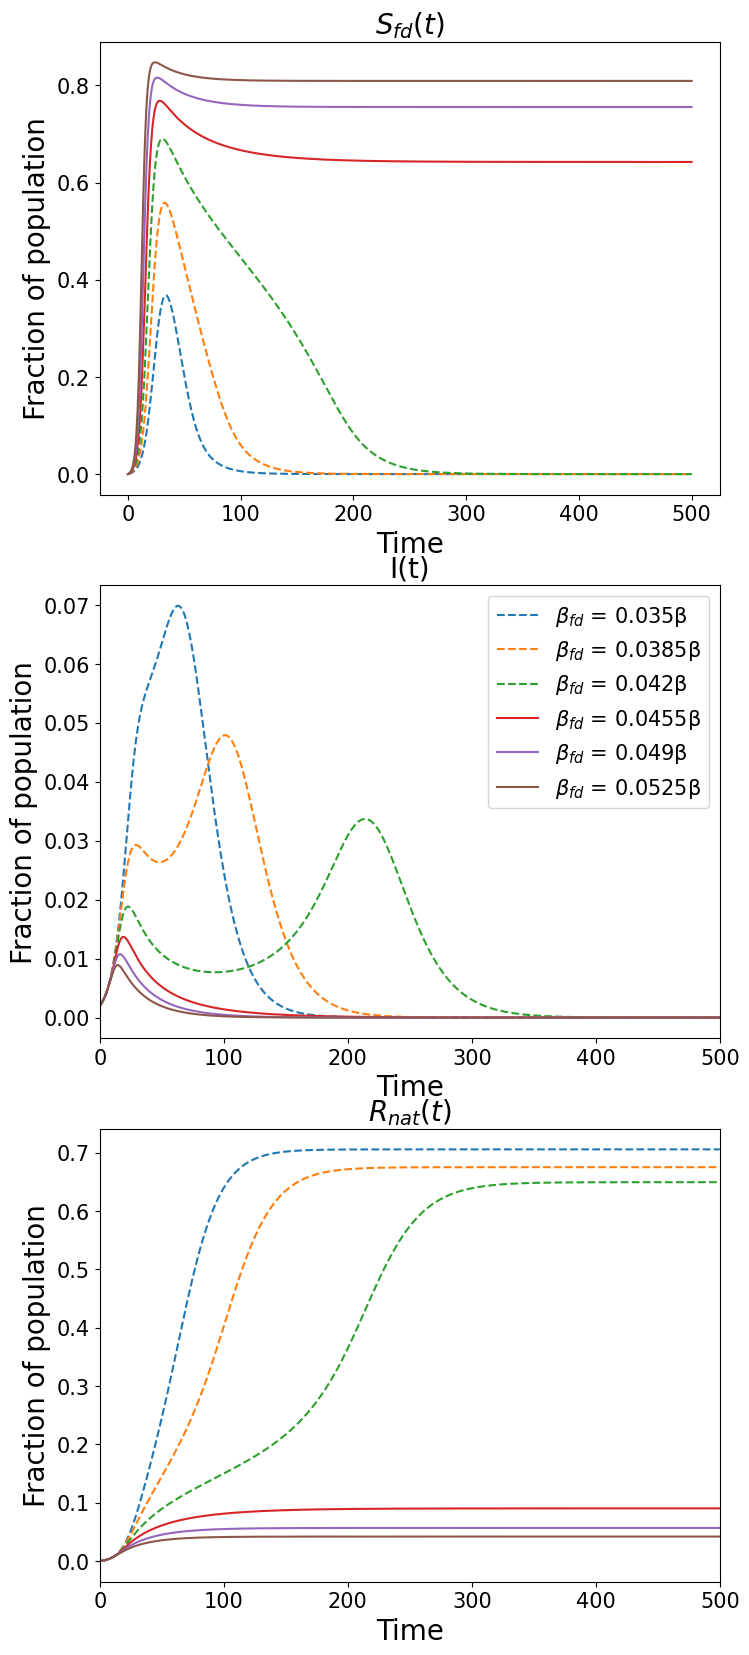

In [86]:
S_1_inf = []

fig,axis = plt.subplots(3,1,figsize=(8,20))
#plt.rcParams['font.size'] = 18 # For the whole figure
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

#labels = [0,0,25,50,75,100,125,150,175,200]

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  S_1_inf.append(z[len(t)-1,1])

  if beta_fd<=0.3428571428571428:
    axis[0].plot(t, z[:,1],'--')
    axis[0].plot()
    #axis[0].set_title('$S_{fd}(t)$')
    #axis[0].set_xlabel('Time', fontsize=20)
    #axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)


    axis[1].plot(t,z[:,2], '--', label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3],'--')
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)

  else:
    axis[0].plot(t, z[:,1])
    axis[0].set_title('$S_{fd}(t)$')
    axis[0].set_xlabel('Time', fontsize=20)
    axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)

    axis[1].plot(t,z[:,2], label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3])
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)
    #axis[2].legend()


for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)

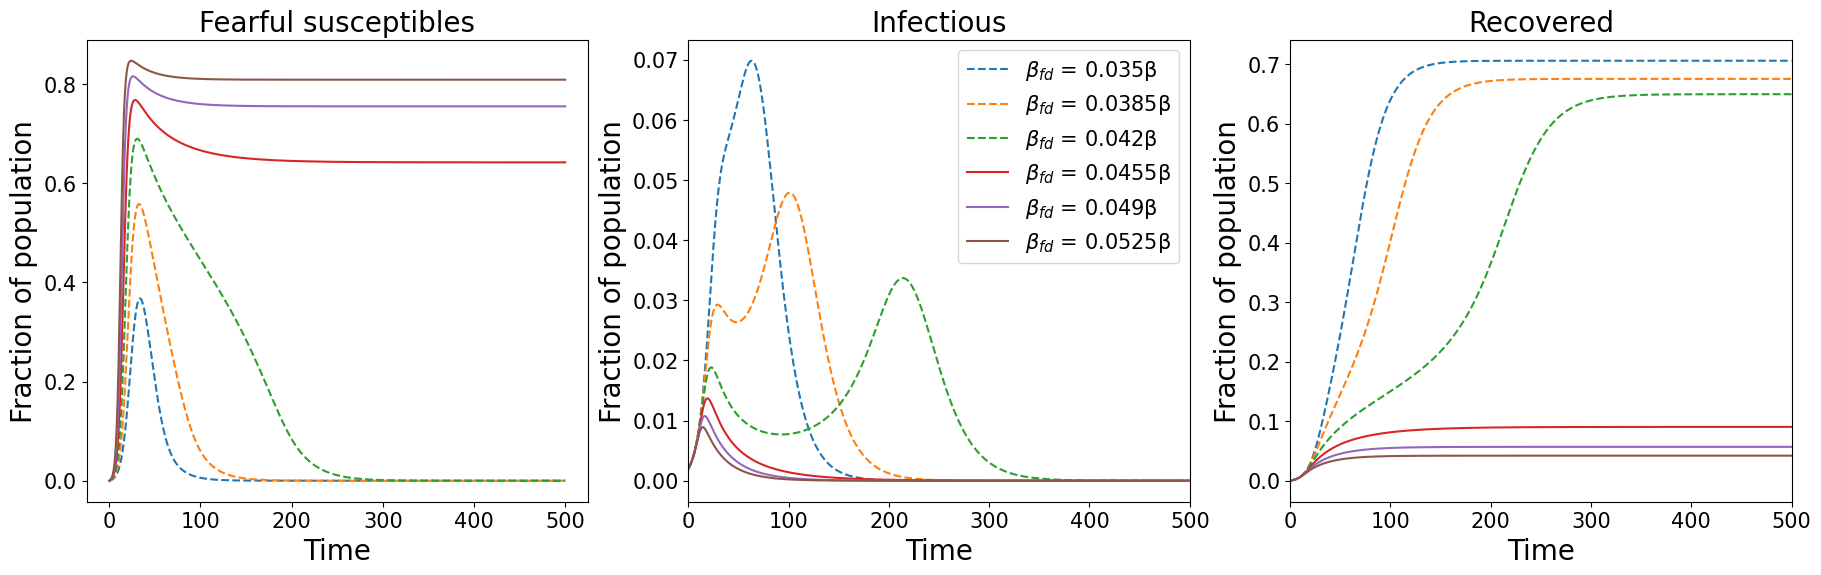

In [87]:
S_1_inf = []

fig,axis = plt.subplots(1,3,figsize=(22,6))
#plt.rcParams['font.size'] = 18 # For the whole figure
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

#labels = [0,0,25,50,75,100,125,150,175,200]

for l in range(len(beta_fd_val)):
  beta_fd = beta_fd_val[l]
  z = odeint(model, Ic, t, args=(beta_fd_val[l],))
  i_input = (beta*z[:,0]+p*beta*z[:,1])*z[:,2]*dt #Rate at which population enters Infectious compartment
  total_infected = sum(i_input)
  S_1_inf.append(z[len(t)-1,1])

  if beta_fd<=0.3428571428571428:
    axis[0].plot(t, z[:,1],'--')
    axis[0].plot()
    #axis[0].set_title('$S_{fd}(t)$')
    #axis[0].set_xlabel('Time', fontsize=20)
    #axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)


    axis[1].plot(t,z[:,2], '--', label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('I(t)')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3],'--')
    axis[2].set_title('$R_{nat}(t)$')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)

  else:
    axis[0].plot(t, z[:,1])
    axis[0].set_title('Fearful susceptibles')
    axis[0].set_xlabel('Time', fontsize=20)
    axis[0].set_ylabel('Fraction of population', fontsize=20)
    #axis[0].set_xticklabels(labels)

    axis[1].plot(t,z[:,2], label='$β_{fd}$ = ' + str(beta_fd_str[l]))
    axis[1].set_title('Infectious')
    axis[1].set_xlabel('Time', fontsize=20)
    axis[1].set_ylabel('Fraction of population', fontsize=20)
    axis[1].set_xlim(0,500)
    axis[1].legend(fontsize=15)

    axis[2].plot(t, z[:,3])
    axis[2].set_title('Recovered')
    axis[2].set_xlabel('Time', fontsize=20)
    axis[2].set_ylabel('Fraction of population', fontsize=20)
    axis[2].set_xlim(0,500)
    #axis[2].legend()


for ax in axis:
    ax.tick_params(axis='x', labelsize=15)  # Change 15 to the desired fontsize
    ax.tick_params(axis='y', labelsize=15)